## Objective
To determine the variety of date fruit using data describing the **colour**, **length**, **diameter**, and **shape**.

## Data
The dataset is obtained from [DATASETS (muratkoklu.com)](http://muratkoklu.com) and was used in the following publication:

- **M. Koklu, R. Kursun, Y.S. Taspinar, and I. Cinar**, "Classification of Date Fruits into Genetic Varieties Using Image Analysis," *Mathematical Problems in Engineering*, Vol. 2021, Article ID: 4793293 (2021).

## Problem Statement
In food production, accurate labeling of ingredients is crucial for both health and business purposes. However, mistakes can happen, and there is significant room for improvement in food labeling practices.

A variety of dates are grown globally, and identifying the specific type requires expertise. The task is to build a machine learning model that can classify the type of date fruit based on external features such as:

- **Colour**
- **Length**
- **Diameter**
- **Shape factors**

These features have been extracted using a computer vision model.

## Task
As a machine learning developer, your goal is to develop a classification model capable of identifying the variety of date fruits from the given features.

---


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Date_Fruit_Datasets.csv')

In [3]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
# This code is designed to display summary statistics for a large dataset by processing the columns in manageable chunks of 10 at a time.
columns2 = data.columns


# Defining the chunk size in this case i want 10.
chunk_size = 10  # Number of columns to display at a time
num_columns = len(columns2)  # Total number of columns in the dataset



# Looping through the columns in chunks
for start in range(0, num_columns, chunk_size):
    
    # Calculating the range of columns to display
    end = min(start + chunk_size, num_columns) 
    
    # Printing the range of columns being displayed
    print(f"Columns {start + 1} to {end}:")
    
    # Displaying summary statistics for these columns
    print(data[columns2[start:end]].describe())
    
    # Adding a separator for readability
    print("\n" + "=" * 80 + "\n")


Columns 1 to 10:
                AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  
count  898.000000  898.000000     898.000000  898.000000    898.000000  
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  
std    119.593888    0.018157  108815.656947    0.053745     17.820778  
min   

In [5]:
# Printing all the data columns
print(data.columns)

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')


In [6]:
# Printing different classes of date
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

## Explanation of the Columns and Dataset Observations

### **1. Morphological Features**
These features describe the physical shape and size of the date fruits:
- **AREA**: The total number of pixels representing the fruit's surface.
- **PERIMETER**: The boundary length of the fruit in pixels.
- **MAJOR_AXIS**: The longest diameter of the fruit's shape.
- **MINOR_AXIS**: The shortest diameter perpendicular to the major axis.
- **ECCENTRICITY**: A measure of how elongated the fruit is, ranging from 0 (circular) to 1 (elongated).
- **EQDIASQ** (Equivalent Diameter): The diameter of a circle with the same area as the fruit.
- **SOLIDITY**: The ratio of the fruit's area to its convex hull area, indicating how compact the shape is.
- **CONVEX_AREA**: The area of the smallest convex polygon enclosing the fruit.
- **EXTENT**: The ratio of the fruit’s area to the bounding box area, showing how much space the fruit occupies in its box.
- **ASPECT_RATIO**: The ratio of the major axis to the minor axis.
- **ROUNDNESS**: Measures how circular the shape is.
- **COMPACTNESS**: A measure of how closely packed the fruit's pixels are.

---

### **2. Shape Features**
These features quantify more intricate shape-related properties:
- **SHAPEFACTOR_1**: Relates to shape complexity based on area and perimeter.
- **SHAPEFACTOR_2**: Another measure of shape irregularity.
- **SHAPEFACTOR_3**: Combines compactness and roundness to describe shape.
- **SHAPEFACTOR_4**: Focuses on the curvature of the fruit's boundary.

---

### **3. Color Features**
These features describe the color distribution of the fruit:
- **MeanRR, MeanRG, MeanRB**: Average values of red, green, and blue intensities in the image.
- **StdDevRR, StdDevRG, StdDevRB**: Standard deviations of red, green, and blue intensities, indicating variability.
- **SkewRR, SkewRG, SkewRB**: Skewness of the red, green, and blue intensities, showing the asymmetry of color distribution.
- **KurtosisRR, KurtosisRG, KurtosisRB**: Kurtosis of red, green, and blue intensities, describing the "tailedness" of the color distribution.
- **EntropyRR, EntropyRG, EntropyRB**: Entropy measures the randomness in color intensity distributions.
- **ALLdaub4RR, ALLdaub4RG, ALLdaub4RB**: Daubechies 4 wavelet features of the red, green, and blue channels, used for texture analysis.

---

### **4. Class**
- The **Class** column identifies the type of date fruit ('BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY').

---

In [20]:
# To check if the entries are the correct datatype, and if there are any missing values. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
AREA             898 non-null int64
PERIMETER        898 non-null float64
MAJOR_AXIS       898 non-null float64
MINOR_AXIS       898 non-null float64
ECCENTRICITY     898 non-null float64
EQDIASQ          898 non-null float64
SOLIDITY         898 non-null float64
CONVEX_AREA      898 non-null int64
EXTENT           898 non-null float64
ASPECT_RATIO     898 non-null float64
ROUNDNESS        898 non-null float64
COMPACTNESS      898 non-null float64
SHAPEFACTOR_1    898 non-null float64
SHAPEFACTOR_2    898 non-null float64
SHAPEFACTOR_3    898 non-null float64
SHAPEFACTOR_4    898 non-null float64
MeanRR           898 non-null float64
MeanRG           898 non-null float64
MeanRB           898 non-null float64
StdDevRR         898 non-null float64
StdDevRG         898 non-null float64
StdDevRB         898 non-null float64
SkewRR           898 non-null float64
SkewRG           898 non-

In [21]:
# Checking if there are any duplicated entries
data.duplicated().sum()

0

## Observations and Explanation

### Dataset Summary
1. **Dataset Shape**:
   - The dataset contains **898 entries (rows)** and **35 columns**, including both features and the target variable (`Class`).
   - There are no missing values in the dataset, as all columns have exactly 898 non-null entries.

2. **Data Types**:
   - Out of the 35 columns:
     - **30 columns** are of type `float64`, representing numerical features with decimal precision.
     - **4 columns** are of type `int64`, representing numerical features without decimals.
     - **1 column** (`Class`) is of type `object`, representing the target variable that categorizes the date fruit type.
---

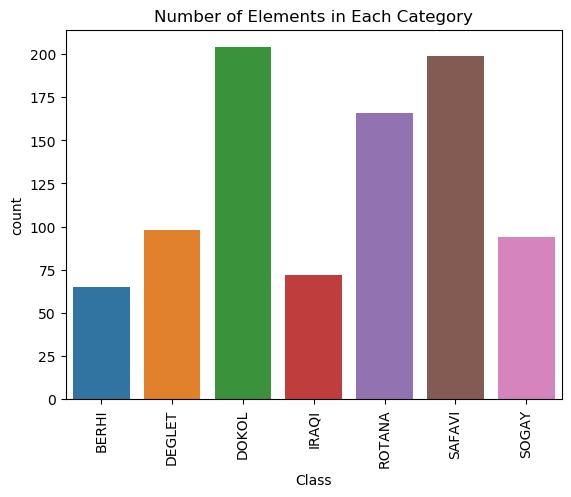

In [22]:
# Creating a barplot of the number of elements in each category.
sns.countplot(x='Class', data=data)
plt.xticks(rotation=90)
plt.title('Number of Elements in Each Category')
plt.show()

# **Dataset Balance Analysis**

The bar chart highlights the distribution of date fruit varieties in the dataset. Below are the key observations and their implications:

## **Class Distribution**
The dataset is **imbalanced**, with some classes being overrepresented:
- **DOKOL** and **SAFAVI** dominate the dataset, with nearly **200 samples** each.
- **BERHI** and **IRAQI** are **underrepresented**, with fewer than **100 samples**.
- Other varieties like **DEGLET**, **ROTANA**, and **SOGAY** have **moderate representation**.

## **Impact of Imbalance**
- **Underrepresented Classes**:  
  Models may struggle to generalize for minority classes like **BERHI** and **IRAQI**, leading to **lower recall** for these varieties.
- **Overrepresented Classes**:  
  The model might favor dominant classes like **DOKOL** and **SAFAVI**, resulting in **biased predictions**.

## **Goal**
✔ Address the imbalance to improve **classification performance** for all varieties, ensuring the model generalizes well across all classes.

## **Plan**
✅ Use **class weighting** during model training to penalize errors on minority classes.  
✅ Evaluate the **model's performance** on each class to ensure **fairness** and balance in predictions.  

---

### Splitting the Data
In this section, we split the dataset into training, validation, and test sets to ensure effective model training and evaluation.

### **Step 1: Define Features and Target Variable**

In [10]:
X = data.drop('Class', axis=1) # Extract all columns except 'Class' as features
y = data['Class']              # Extract 'Class' column as the target variable

---
#### **Final Dataset Distribution**

| **Dataset**       | **Percentage** | **Purpose**                                      |
|-------------------|--------------|--------------------------------------------------|
| **Training Set**  | **64%**       | Used for learning patterns                      |
| **Validation Set** | **16%**      | Used for hyperparameter tuning & model selection |
| **Test Set**      | **20%**       | Final evaluation of model performance           |


In [11]:
# Initial split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

---

### Features scaling 

In [12]:
# Initialize and fit scaler on training features only
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)          
X_test_scaled = scaler.transform(X_test)        

#### **Feature Scaling with MinMaxScaler**

#### **What’s Happening?**
1. **Initialize the Scaler**  
   - `MinMaxScaler()` scales all features between `[0,1]`.

2. **Fit and Transform Training Data**  
   - `scaler.fit_transform(X_train)`: Learns min/max values from training data and scales features.

3. **Transform Validation & Test Data**  
   - `scaler.transform(X_val)` and `scaler.transform(X_test)`: Applies the same scaling to keep consistency.

#### **Why is this Important?**
- **Balances Feature Ranges**: Prevents larger values from dominating smaller ones.  
- **Speeds Up Training**: Neural networks converge faster with scaled inputs.  
- **Prevents Data Leakage**: Ensures test data is scaled using training set parameters.  
---

### label Encoding

In [13]:
# Initialize and fit encoder on training labels only
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)  # Fit and transform on train
y_val_encoded = encoder.transform(y_val)          # Transform on validation
y_test_encoded = encoder.transform(y_test)        # Transform on test

In [14]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(label_mapping)

{'BERHI': 0, 'DEGLET': 1, 'DOKOL': 2, 'IRAQI': 3, 'ROTANA': 4, 'SAFAVI': 5, 'SOGAY': 6}


#### **Label Encoding for Target Variable**

#### **What’s Happening?**
1. **Initialize the Encoder**  
   - `LabelEncoder()` converts categorical labels (e.g., "BERHI", "DEGLET") into numerical values.

2. **Fit and Transform Training Labels**  
   - `encoder.fit_transform(y_train)`: Learns label mappings from training data and converts them to numbers.

3. **Transform Validation & Test Labels**  
   - `encoder.transform(y_val)` and `encoder.transform(y_test)`: Applies the same mapping to keep label consistency.

#### **Why is this Important?**
- **Converts Categorical Data to Numeric**: Machine learning models require numerical inputs.  
---

### Modeling

#### Build the Model

In [15]:
# Using tf.keras.Sequential to create a fully connected neural network with at least two hidden layers.

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(len(encoder.classes_), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2

#### **Summary: Building the Neural Network**
- **Created a sequential neural network** with two hidden layers.
- **Used ReLU activation** for non-linearity and efficient learning.
- **Applied regularization techniques** (L2, Batch Normalization, Dropout) to prevent overfitting.
- **Output layer uses Softmax** to produce class probabilities for multi-class classification.
---

#### Compile the model

In [16]:
# Compiling the model with a choice of optimizer and loss function, and the set the metrics argument equal to ['accuracy'].
# Using 'sparse_categorical_crossentropy' as loss function because the labels are encoded as integers.

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### **Summary: Compiling the Model**
- **Optimizer**: Uses **Adam** with a learning rate of `0.001`.
- **Loss Function**: **Sparse Categorical Crossentropy**, suitable for multi-class classification with integer-encoded labels.
- **Evaluation Metric**: **Accuracy**, to track the model's performance during training.
- **Purpose**: Prepares the model for training by defining how it learns and evaluates predictions.
---

#### Train the model

In [17]:
# Train the model and record the training and validation accuracy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# 1.) 
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# 2.) 
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)

class_weights_dict = dict(enumerate(class_weights))

# 3.) 
history = model.fit(
    X_train_scaled, y_train_encoded,
    epochs=100,
    validation_data=(X_val_scaled, y_val_encoded),
    callbacks=[early_stop],
    class_weight=class_weights_dict)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 574 samples, validate on 144 samples
Epoch 1/100
574/574 [==============================] - 1s 929us/sample - loss: 2.4703 - accuracy: 0.2125 - val_loss: 1.9282 - val_accuracy: 0.3958
Epoch 2/100
574/574 [==============================] - 0s 74us/sample - loss: 1.6821 - accuracy: 0.4164 - val_loss: 1.8242 - val_accuracy: 0.4306
Epoch 3/100
574/574 [==============================] - 0s 71us/sample - loss: 1.4934 - accuracy: 0.5244 - val_loss: 1.7496 - val_accuracy: 0.4931
Epoch 4/100
574/574 [==============================] - 0s 63us/sample - loss: 1.2998 - accuracy: 0.5488 - val_loss: 1.6892 - val_accuracy: 0.5486
Epoch 5/100
574/574 [==============================] - 0s 57us/sample - loss: 1.3042 - accuracy: 0.5767 - val_loss: 1.6215 - val_accuracy: 0.5972
Epoch 6/100
574/574 [==============================] - 0s 74us/sample - loss: 1.0950 - accuracy: 0.6603 - val_loss: 1.5517 - val_accuracy: 0.6389
Epoch 7/100
574/574 [======

#### **Training the Model with Early Stopping and Class Weights**

#### **What’s Happening?**
1. **Early Stopping**  
   - `EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)`  
   - Stops training if validation loss doesn’t improve for **10 consecutive epochs**, preventing **overfitting**.

2. **Handling Class Imbalance**  
   - `compute_class_weight()` assigns **higher weights** to underrepresented classes, ensuring the model doesn’t favor majority classes.
   - Converts these weights into a dictionary (`class_weights_dict`) to be used during training.

3. **Training the Model**  
   - `model.fit(...)` trains the neural network for **100 epochs** with:  
     - **Training Data**: `X_train_scaled`, `y_train_encoded`
     - **Validation Data**: `X_val_scaled`, `y_val_encoded`
     - **Class Weights**: Balances the impact of different class sizes.
     - **Callbacks**: Uses **early stopping** to prevent overfitting.

### **Why is This Important?**
- **Prevents Overfitting**: Stops training early when performance starts degrading.
- **Handles Imbalance**: Ensures fair learning across all classes.
- **Improves Generalization**: Helps the model perform well on unseen data.
---

#### Evaluate the Model

In [18]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")



# Generating predictions and classification report
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)



# Converting encoded labels back to original class names
class_names = encoder.classes_



# Printing the Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes, target_names=class_names))


Test Accuracy: 0.9222

Classification Report:
              precision    recall  f1-score   support

       BERHI       0.92      0.92      0.92        13
      DEGLET       0.83      0.75      0.79        20
       DOKOL       0.97      0.95      0.96        41
       IRAQI       0.93      0.93      0.93        14
      ROTANA       0.97      0.91      0.94        33
      SAFAVI       1.00      1.00      1.00        40
       SOGAY       0.71      0.89      0.79        19

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.90       180
weighted avg       0.93      0.92      0.92       180



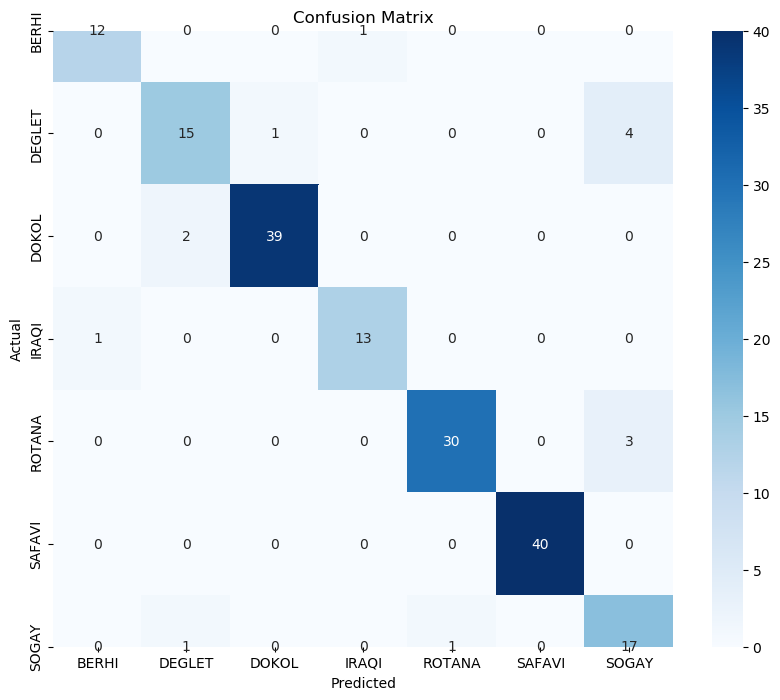

In [19]:
# Ploting confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


---
#### **Model Performance Analysis**

#### **1. Overall Accuracy**
- The model achieved a **test accuracy of 92.22%**, meaning it correctly classifies **92% of the test samples**.
- This indicates strong performance in recognizing different date fruit varieties.

#### **2. Class-Level Performance**
#### **High-Performing Classes:**
- **SAFAVI** (1.00 precision, recall, and F1-score) → **Perfect classification**.
- **DOKOL & ROTANA** also have **high precision and recall**, meaning the model predicts them with great confidence.

#### **Lower-Performing Classes:**
- **DEGLET** (0.83 precision, 0.75 recall) → The model **struggles to identify** some DEGLET samples correctly (**lower recall**).
- **SOGAY** (0.71 precision, 0.89 recall) → The model **predicts more false positives** (**lower precision**) but still captures most SOGAY samples (**high recall**).

#### **3. Macro vs. Weighted Average**
- **Macro Avg (0.91 precision, recall, F1-score)**:  
  - Shows **balanced performance across all classes**, treating each class equally.
- **Weighted Avg (0.93 precision, recall, F1-score)**:  
  - Slightly higher, meaning the model performs better for **majority classes** (**DOKOL, SAFAVI**).
---